In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
from implementation import *
from helpers import *
from cross_validation import *
from proj_helpers import *

In [3]:
# set random seed
np.random.seed(10)

In [4]:
# Load training data
DATA_TRAIN_PATH = 'data/train.csv'
y_data, tX_data, ids = load_csv_data(DATA_TRAIN_PATH)


In [12]:
# define models
models = ['gd',
          'sgd',
          'least squares',
          'ridge regression',
          'logistic regression',
          'regularized logistic regression']

# select model
selected_model = 'ridge regression'

#define parameters
poly_degrees_dict = {0 : [14], 1 : [18], 2 : [7], 3 : [14]} # fixed degrees for each mask
inv_log_degrees_dict = {0 : [12], 1 : [18], 2 : [14], 3 : [7]} # # fixed degrees for each mask

#poly_degrees = np.linspace(7, 20, 14, dtype='int')
#inv_log_degrees = np.linspace(7, 20, 14, dtype='int')

gammas = [1] #np.logspace(-10, -1, 10)
lambdas = [1e-13] #np.logspace(-15, 0, 30)
max_iters = [10] #list(range(10,100,10))

Training with ridge regression
Preprocessing mask 0
Best parameters for mask 0:
{'poly_degree': 13, 'log_degree': 7, 'max_iteration': 10, 'gamma': 1, 'lambda': 1e-13, 'acc_mean': 0.7657422186751796, 'acc_std': 0.004880484706782157}


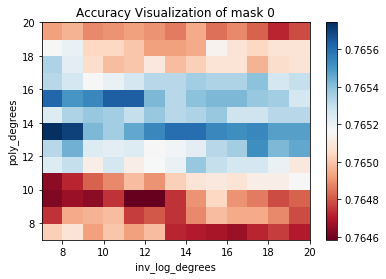

---------------------------------------------------------------------------------
Preprocessing mask 1


KeyboardInterrupt: 

In [14]:
# define cross validation parameters
ratio = 0.5 # ratio of complete data to use (for testing purpose - much faster)
k_fold = 5 # number of folds to use for the cross validation
# -------------------------------------

# shuffle dataset
shuffle_indices = np.random.permutation(np.arange(len(y_data)))
shuffled_y = y_data[shuffle_indices]
shuffled_tx = tX_data[shuffle_indices]

tX = shuffled_tx[:int(ratio * tX_data.shape[0])]
y = shuffled_y[:int(ratio * y_data.shape[0])]

# training
mask = get_categorical_masks(tX)

print('Training with {}'.format(selected_model))
for idx in mask:
    print('Preprocessing mask {}'.format(idx))
    
    xtrain = tX[mask[idx]]
    ytrain = y[mask[idx]]
    
    # use for fixed degrees
    poly_degrees = poly_degrees_dict[idx]
    inv_log_degrees = inv_log_degrees_dict[idx]
    # ----------------------------
    
    grid_results = cross_validation_demo(ytrain, xtrain, selected_model, poly_degrees, inv_log_degrees, max_iters, gammas, lambdas, k_fold)
    print(f'Best parameters for mask {idx}:')
    print(grid_results[find_best_parameters(grid_results, min_=False)[1]], sep='\n')
    
    # visualization of accuracy
    if len(poly_degrees) == 1 and len(inv_log_degrees) == 1 and len(gammas) == 1 and len(max_iters) == 1 and len(lambdas) > 1:
        accuracy_visualization_1(lambdas, [d['acc_mean'] for d in grid_results], param1='lambda', title=f'Accuracy plot of mask {idx} for lambda')
    
    if len(poly_degrees) == 1 and len(inv_log_degrees) == 1 and len(lambdas) == 1 and len(max_iters) == 1 and len(gammas) > 1:
        accuracy_visualization_1(gammas, [d['acc_mean'] for d in grid_results], param1='gamma', title=f'Accuracy plot of mask {idx} for gamma')
    
    if len(poly_degrees) == 1 and len(inv_log_degrees) == 1 and len(lambdas) == 1 and len(gammas) == 1 and len(max_iters) > 1:
        accuracy_visualization_1(max_iters, [d['acc_mean'] for d in grid_results], param1='max_iters', title=f'Accuracy plot of mask {idx} for max_iters')
    
    if len(lambdas) == 1 and len(gammas) == 1 and len(poly_degrees) > 2 and len(inv_log_degrees) > 2:
        A = np.zeros((len(poly_degrees), len(inv_log_degrees)))
        poly_dict = dict(zip(poly_degrees, list(range(0,len(poly_degrees)))))
        log_dict = dict(zip(inv_log_degrees, list(range(0,len(inv_log_degrees)))))
        for d in grid_results:
            A[poly_dict[d['poly_degree']], log_dict[d['log_degree']]] = d['acc_mean']
        accuracy_visualization_2(inv_log_degrees, poly_degrees, A, name_x='inv_log_degrees', name_y='poly_degrees', title=f'Accuracy Visualization of mask {idx}')
    #-----------------------------------------------------------------------------------

    print('---------------------------------------------------------------------------------')